# Basic Operations on Images

Source: https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html

## Goal

Learn to:
- Access pixel values and modify them
- Access image properties
- Set a Region of Interest (ROI)
- Split and merge images

Almost all the operations in this section are mainly related to Numpy rather than OpenCV. A good knowledge of Numpy is required to write better optimized code with OpenCV.

*( Examples will be shown in a Python terminal, since most of them are just single lines of code )*

## Accessing and Modifying pixel values

Let's load a color image first:

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
img = cv.imread('../images/messi5.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

You can access a pixel value by its row and column coordinates. For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned.

In [3]:
px = img[100,100]
print(px)

[157 166 200]


In [4]:
# accessing only blue pixel
blue = img[100,100,0]
print( blue )

157


You can modify the pixel values the same way.

In [5]:
img[100,100] = [255,255,255]
print( img[100,100] )

[255 255 255]


**Warning**

Numpy is an optimized library for fast array calculations. So simply accessing each and every pixel value and modifying it will be very slow and it is discouraged.

>**Note**
>>The above method is normally used for selecting a region of an array, say the first 5 rows and last 3 columns. For individual pixel >>access, the Numpy array methods, array.item() and array.itemset() are considered better. They always return a scalar, however, so if >>you want to access all the B,G,R values, you will need to call array.item() separately for each value.

Better pixel accessing and editing method :

In [6]:
# accessing RED value
img.item(10,10,2)

59

In [7]:
# modifying RED value
img.itemset((10,10,2),100)

In [8]:
img.item(10,10,2)

100

## Accessing Image Properties

Image properties include number of rows, columns, and channels; type of image data; number of pixels; etc.

The shape of an image is accessed by img.shape. It returns a tuple of the number of rows, columns, and channels (if the image is color):

In [9]:
print( img.shape )

(342, 548, 3)


>**Note**
>>If an image is grayscale, the tuple returned contains only the number of rows and columns, so it is a good method to check whether the >>loaded image is grayscale or color.

Total number of pixels is accessed by `img.size`:

In [10]:
print( img.size )

562248


Image datatype is obtained by `img.dtype`:

In [11]:
print( img.dtype )

uint8


>**Note**
>>img.dtype is very important while debugging because a large number of errors in OpenCV-Python code are caused by invalid datatype.

## Image ROI

Sometimes, you will have to play with certain regions of images. For eye detection in images, first face detection is done over the entire image. When a face is obtained, we select the face region alone and search for eyes inside it instead of searching the whole image. It improves accuracy (because eyes are always on faces :D ) and performance (because we search in a small area).

ROI is again obtained using Numpy indexing. Here I am selecting the ball and copying it to another region in the image:

In [12]:
ball = img[280:340, 330:390]

In [13]:
img[273:333, 100:160] = ball

Check the results below:

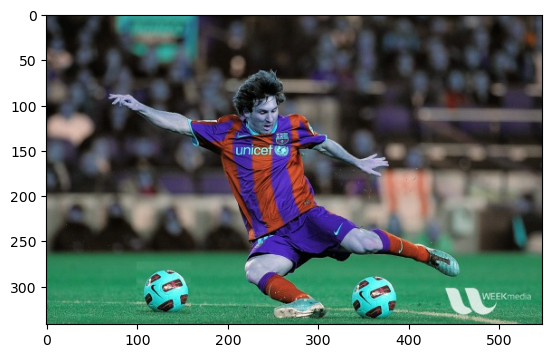

In [14]:
plt.imshow(img)
plt.show()

## Splitting and Merging Image Channels

Sometimes you will need to work separately on the B,G,R channels of an image. In this case, you need to split the BGR image into single channels. In other cases, you may need to join these individual channels to create a BGR image. You can do this simply by:

In [15]:
b,g,r = cv.split(img)

In [16]:
img = cv.merge((b,g,r))

Or

In [17]:
b = img[:,:,0]

Suppose you want to set all the red pixels to zero - you do not need to split the channels first. Numpy indexing is faster:

In [18]:
img[:,:,2] = 0

**Warning**

**[cv.split()](https://docs.opencv.org/4.5.5/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518ahttps://docs.opencv.org/4.5.5/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a)** is a costly operation (in terms of time). So use it only if necessary. Otherwise go for Numpy indexing.

## Making Borders for Images (Padding)

If you want to create a border around an image, something like a photo frame, you can use [cv.copyMakeBorder()](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga2ac1049c2c3dd25c2b41bffe17658a36). But it has more applications for convolution operation, zero padding etc. This function takes following arguments:

- **src** - input image
- **top, bottom, left, right** - border width in number of pixels in corresponding directions
- **borderType** - Flag defining what kind of border to be added. It can be following types:
    - **[cv.BORDER_CONSTANT](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#gga209f2f4869e304c82d07739337eae7c5aed2e4346047e265c8c5a6d0276dcd838)** - Adds a constant colored border. The value should be given as next argument.
    - **[cv.BORDER_REFLECT](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#gga209f2f4869e304c82d07739337eae7c5a815c8a89b7cb206dcba14d11b7560f4b)** - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
    - **[cv.BORDER_REFLECT_101](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#gga209f2f4869e304c82d07739337eae7c5ab3c5a6143d8120b95005fa7105a10bb4)** or **[cv.BORDER_DEFAULT](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#gga209f2f4869e304c82d07739337eae7c5afe14c13a4ea8b8e3b3ef399013dbae01)** - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
    - **[cv.BORDER_REPLICATE](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#gga209f2f4869e304c82d07739337eae7c5aa1de4cff95e3377d6d0cbe7569bd4e9f)** - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
    - **[cv.BORDER_WRAP](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#gga209f2f4869e304c82d07739337eae7c5a697c1b011884a7c2bdc0e5caf7955661)** - Can't explain, it will look like this : cdefgh|abcdefgh|abcdefg
- **value** - Color of border if border type is **[cv.BORDER_CONSTANT](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#gga209f2f4869e304c82d07739337eae7c5aed2e4346047e265c8c5a6d0276dcd838)**

Below is a sample code demonstrating all these border types for better understanding:

In [19]:
BLUE = [255,0,0]
img1 = cv.imread('../images/opencv-logo.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"

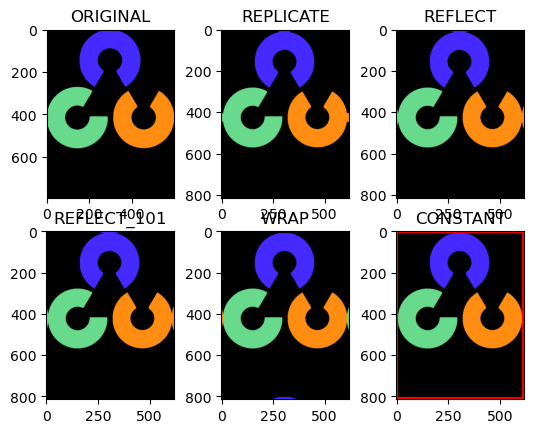

In [20]:
replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()